In [80]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [81]:
FEATURE_PATH = "../dataset/processed"

X = np.load(f"{FEATURE_PATH}/X_hog.npy")
y = np.load(f"{FEATURE_PATH}/y.npy")

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2856, 6354)
y shape: (2856,)


In [82]:
CLASSES = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
print("Classes:", CLASSES)


Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [83]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Validation samples:", X_val.shape[0])


Training samples: 2284
Validation samples: 572


In [84]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled val shape:", X_val_scaled.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=200, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

print("PCA train shape:", X_train_pca.shape)
print("PCA val shape:", X_val_pca.shape)


Scaled train shape: (2284, 6354)
Scaled val shape: (572, 6354)
PCA train shape: (2284, 200)
PCA val shape: (572, 200)


In [85]:
svm_model = joblib.load("../models/svm_best.pkl")
knn_model = joblib.load("../models/knn_best.pkl")

print("Models loaded successfully.")


Models loaded successfully.


In [86]:
y_pred_svm = svm_model.predict(X_val_scaled)

svm_acc = accuracy_score(y_val, y_pred_svm)
print("SVM Validation Accuracy:", svm_acc)

print("\nSVM Classification Report:")
print(classification_report(y_val, y_pred_svm, target_names=CLASSES))


SVM Validation Accuracy: 0.75

SVM Classification Report:
              precision    recall  f1-score   support

   cardboard       0.70      0.80      0.75        95
       glass       0.71      0.79      0.75        95
       metal       0.77      0.61      0.68        95
       paper       0.77      0.78      0.77        96
     plastic       0.74      0.66      0.70        96
       trash       0.82      0.86      0.84        95

    accuracy                           0.75       572
   macro avg       0.75      0.75      0.75       572
weighted avg       0.75      0.75      0.75       572



In [87]:
y_pred_knn = knn_model.predict(X_val_pca)

knn_acc = accuracy_score(y_val, y_pred_knn)
print("k-NN Validation Accuracy:", knn_acc)

print("\nk-NN Classification Report:")
print(classification_report(y_val, y_pred_knn, target_names=CLASSES))


k-NN Validation Accuracy: 0.666083916083916

k-NN Classification Report:
              precision    recall  f1-score   support

   cardboard       0.78      0.78      0.78        95
       glass       0.62      0.58      0.60        95
       metal       0.68      0.48      0.56        95
       paper       0.70      0.76      0.73        96
     plastic       0.47      0.59      0.53        96
       trash       0.79      0.80      0.80        95

    accuracy                           0.67       572
   macro avg       0.67      0.67      0.67       572
weighted avg       0.67      0.67      0.67       572



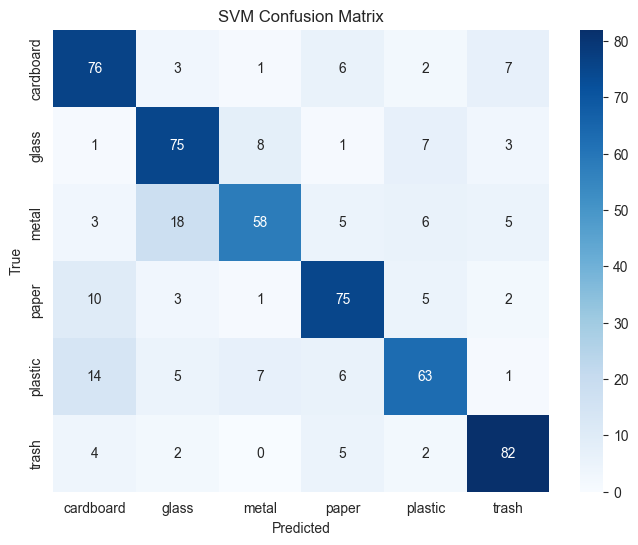

In [88]:
cm_svm = confusion_matrix(y_val, y_pred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, fmt="d",
            xticklabels=CLASSES,
            yticklabels=CLASSES,
            cmap="Blues")

plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("../reports/figures/svm_confusion.png")
plt.show()


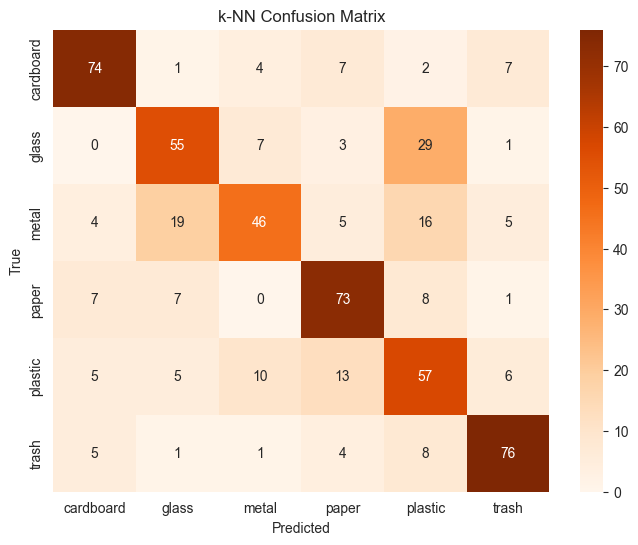

In [89]:
cm_knn = confusion_matrix(y_val, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm_knn, annot=True, fmt="d",
            xticklabels=CLASSES,
            yticklabels=CLASSES,
            cmap="Oranges")

plt.title("k-NN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("../reports/figures/knn_confusion.png")
plt.show()


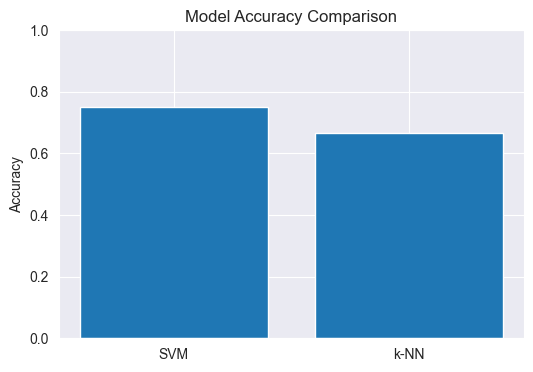

In [90]:
models = ["SVM", "k-NN"]
accuracies = [svm_acc, knn_acc]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.savefig("../reports/figures/model_comparison.png")
plt.show()
